In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import solve_ivp
import perlin

plt.rcParams['agg.path.chunksize'] = 10000

rng = np.random.default_rng()


In [14]:
perlin_gen = perlin.PerlinNoiseFactory(dimension=3,octaves=3)

In [20]:
# colors

winter = ['#0D1B2A','#1B263B','#415A77','#778DA9','#E0E1DD']
summer = ["#0081af","#00abe7","#56351E","#ead2ac","#eaba6b"]
autumn = ["#f0a202","#f18805","#d95d39","#202c59","#581f18"]
spring = ["#FAC8CD","#66a182","#233329","#FFB30F","#c0d461"]
pikachu = ["#000000","#eabb1f","#C04A35","#846339","#daaf44","#eabb1f","#846339","#daaf44"]
paradise_pink = ["#053225","#e34a6f","#f7b2bd","#b2a198","#60a561"]
pastel  = ["#d6f6dd","#dac4f7","#f4989c","#ebd2b4","#acecf7"]
pastel2 = ["#dd6e42","#4f6d7a","#b37ba4","#d99ac5","#acecf7"]
bright_winter = ["#2b4141","#0eb1d2","#34e4ea","#8ab9b5","#c8c2ae"]
flags = ["#d05353","#083d77","#ebebd3","#f4d35e","#0ead69"]

## The Hexagonal grid

Consider the vectors

\begin{equation}
    \hat{x}_1 = \begin{pmatrix}1 \\ 0\end{pmatrix},\quad\hat{x}_2 = \begin{pmatrix}-\frac{1}{2} \\ \frac{\sqrt{3}}{2} \end{pmatrix},\quad\hat{x}_3 = \begin{pmatrix} -\frac{1}{2} \\ -\frac{\sqrt{3}}{2}\end{pmatrix}
\end{equation}
which generate the lattice
\begin{equation}
\Lambda = \{i h\hat{x}_1 + jh\hat{x}_2~:~-N\leq i,j\leq N\},
\end{equation}
for some length $h$ which is small.

We want to generate a neat, symmetrical grid. It can be generated in three sectors, each
generated by the pairs $(\hat{x}_1,\hat{x}_2)$, $(\hat{x}_2,\hat{x}_3)$, and $(\hat{x}_3,\hat{x}_1)$. We call
these sectors Sector I, II, and III, respectively.

In [35]:
x1 = np.array([1,0])
x2 = np.array([-0.5,np.sqrt(3)/2])
x3 = -x1 -x2

offset = 0
scale = np.sqrt(3)
N_side = 15

t = 2

#first sector
vertices = [scale*(i+offset)*x1 + scale*(j+offset)* x2 for i in range(N_side+1) for j in range(N_side+1)]
#second sector
vertices = vertices + [scale*(i+offset)*x2 + scale*(j+offset)*x3 for i in range(N_side+1) for j in range(1,N_side+1)]
#third sector
vertices = vertices + [scale*(i+offset)*x3 + scale*(j+offset)*x1 for i in range(1,N_side+1) for j in range(1,N_side+1)]

vertices = np.array(vertices)

noises = np.array([ perlin_gen(vertex[0]/N_side,vertex[1]/N_side,t) for vertex in vertices])
noises = (noises-noises.min())/(noises.max()-noises.min())

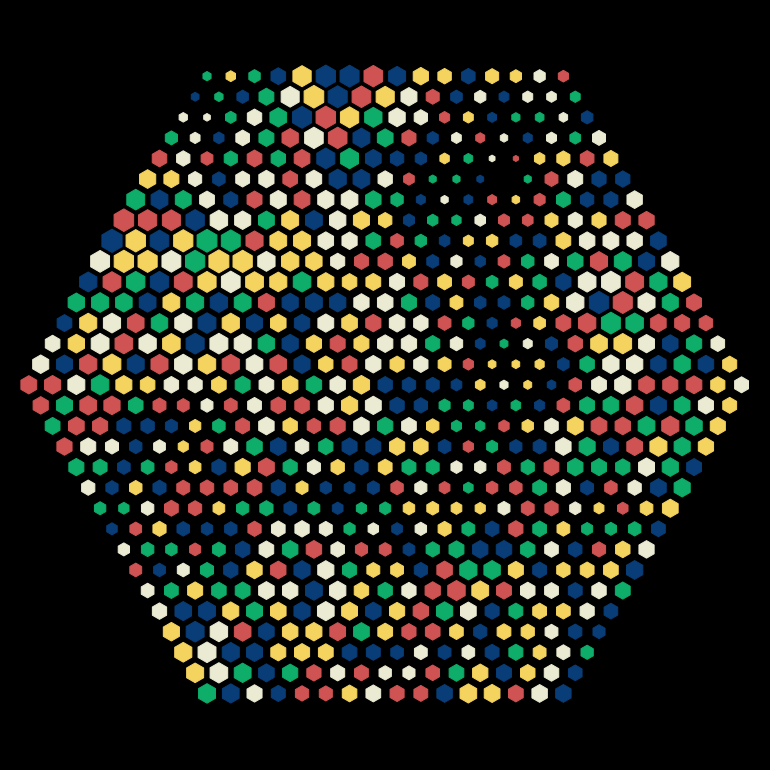

In [36]:
palette = flags


fig, ax = plt.subplots(figsize=(10.8,19.20))
#ax.scatter(vertices[:,0],vertices[:,1],c='k',marker='.')

for vertex, noise in zip(vertices,noises):
    
    color = rng.choice(palette)
    
    size = 0.85*np.sqrt(noise)
    
    #size = 0.95*np.sqrt(size)
    
    angle = 360*(1-np.cos(2*np.pi*(1-noise))**4)
    
    hexagon = mpl.patches.RegularPolygon(vertex,
                                         numVertices=6,
                                         radius=size*scale/np.sqrt(3),
                                         fc=color,
                                         lw=1,
                                         ec=color,
                                         orientation=0,
                                         )
    
    ax.add_patch(hexagon)


ax.axis('equal')
ax.axis('off')
ax.set_facecolor('k')
#ax.set_xlim(-0.25*np.sqrt(6)*N_side,0.25*np.sqrt(6)*N_side)
#ax.set_ylim(-0.25*np.sqrt(6)*N_side,0.25*np.sqrt(6)*N_side)
#ax.set_xlim(-2*N_side/3,2*N_side/3)
#ax.set_ylim(-2*N_side/3,2*N_side/3)

ax.set_xlim(-scale*(N_side+0.5),scale*(N_side+0.5))
ax.set_ylim(-scale*(N_side+0.5),scale*(N_side+0.5))

fig.set_facecolor('k')
fig.patch.set_alpha(1)
fig.tight_layout()
fig.savefig('hexagons.png',dpi=200,bbox_inches='tight',pad_inches=0.0)
plt.show()

Generating noise...
Noise max: 0.44698670642251753 noise min: -0.2677335085948589
Normalizing noise...
Drawing...
Frame 1 of 180
Frame 2 of 180
Frame 3 of 180
Frame 4 of 180
Frame 5 of 180
Frame 6 of 180
Frame 7 of 180
Frame 8 of 180
Frame 9 of 180
Frame 10 of 180
Frame 11 of 180
Frame 12 of 180
Frame 13 of 180
Frame 14 of 180
Frame 15 of 180
Frame 16 of 180
Frame 17 of 180
Frame 18 of 180
Frame 19 of 180
Frame 20 of 180
Frame 21 of 180
Frame 22 of 180
Frame 23 of 180
Frame 24 of 180
Frame 25 of 180
Frame 26 of 180
Frame 27 of 180
Frame 28 of 180
Frame 29 of 180
Frame 30 of 180
Frame 31 of 180
Frame 32 of 180
Frame 33 of 180
Frame 34 of 180
Frame 35 of 180
Frame 36 of 180
Frame 37 of 180
Frame 38 of 180
Frame 39 of 180
Frame 40 of 180
Frame 41 of 180
Frame 42 of 180
Frame 43 of 180
Frame 44 of 180
Frame 45 of 180
Frame 46 of 180
Frame 47 of 180
Frame 48 of 180
Frame 49 of 180
Frame 50 of 180
Frame 51 of 180
Frame 52 of 180
Frame 53 of 180
Frame 54 of 180
Frame 55 of 180
Frame 56 of 180

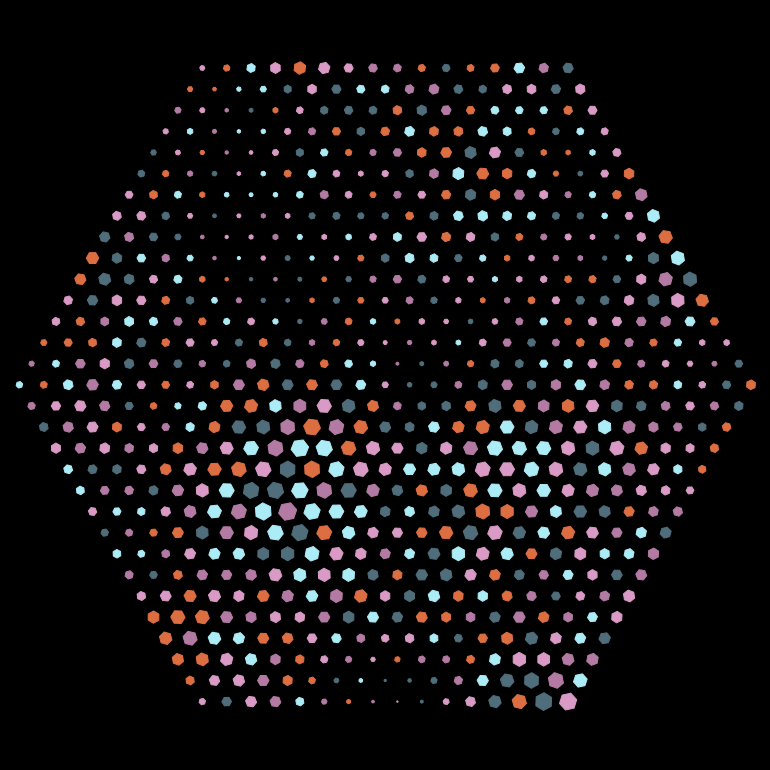

In [4]:
x1 = np.array([1,0])
x2 = np.array([-0.5,np.sqrt(3)/2])
x3 = -x1 -x2

offset = 0
scale = np.sqrt(3)
N_side = 15
palette = pastel2

frames = 180
Ts = np.linspace(0,1,frames,endpoint=False)

#first sector
vertices = [scale*(i+offset)*x1 + scale*(j+offset)* x2 for i in range(N_side+1) for j in range(N_side+1)]
#second sector
vertices = vertices + [scale*(i+offset)*x2 + scale*(j+offset)*x3 for i in range(N_side+1) for j in range(1,N_side+1)]
#third sector
vertices = vertices + [scale*(i+offset)*x3 + scale*(j+offset)*x1 for i in range(1,N_side+1) for j in range(1,N_side+1)]

vertices = np.array(vertices)


fig, ax = plt.subplots(figsize=(10.8,10.8))
#ax.scatter(vertices[:,0],vertices[:,1],c='k',marker='.')
fig.set_facecolor('k')
fig.patch.set_alpha(1)
    

colors = rng.choice(palette,size=len(vertices))

perlin_factory = perlin.PerlinNoiseFactory(dimension=4,octaves=3)

print('Generating noise...')
noises = np.array([[perlin_factory(vertex[0]/N_side,
                                   vertex[1]/N_side,
                                   0.25*np.cos(2*np.pi*t),
                                   0.25*np.sin(2*np.pi*t)) for vertex in vertices] for t in Ts])

print('Noise max:',noises.max(), 'noise min:',noises.min())
print('Normalizing noise...')
noises = (noises-noises.min())/(noises.max()-noises.min())
print('Drawing...')

for frame,t in enumerate(Ts):

    ax.cla()
    
    for vertex,color,size in zip(vertices,colors,noises[frame]):

        size = 0.9*size
        
        angle = 360*(1-np.cos(2*np.pi*(1-size))**4)

        hexagon = mpl.patches.RegularPolygon(vertex,
                                             numVertices=6,
                                             radius=size*scale/np.sqrt(3),
                                             fc=color,
                                             lw=1,
                                             ec=color,
                                             orientation=angle,
                                             )

        ax.add_patch(hexagon)


    ax.set_facecolor('k')
    #ax.set_xlim(-0.25*np.sqrt(6)*N_side,0.25*np.sqrt(6)*N_side)
    #ax.set_ylim(-0.25*np.sqrt(6)*N_side,0.25*np.sqrt(6)*N_side)
    #ax.set_xlim(-2*N_side/3,2*N_side/3)
    #ax.set_ylim(-2*N_side/3,2*N_side/3)

    ax.set_xlim(-scale*(N_side+0.5),scale*(N_side+0.5))
    ax.set_ylim(-scale*(N_side+0.5),scale*(N_side+0.5))
    ax.axis('off')
    
    fig.tight_layout()
    fig.savefig('animation/hexagons-noise%04d.png'%frame,dpi=200,bbox_inches='tight',pad_inches=0.0)
    print('Frame',frame+1,'of',len(Ts))
plt.show()

In [26]:
## Function on hex grid class
    
x_1 = np.array([1,0])
x_2 = np.array([-0.5,np.sqrt(3)/2])
x_3 = -x_1 -x_2
    

class HexGridFunction:
    
    def __init__(self,size,boundary_fn = lambda x: 0,scale = None):
        
        self.size = size
        
        #includes the line spanned by x_2 and the line spanned by x_1
        self.sector_I = np.zeros([size+1,size+1]) + 0*1j
        
        #includes line spanned by x_3
        self.sector_II = np.zeros([size+1,size]) + 0*1j
        
        #does not include boundaries between sectors
        self.sector_III = np.zeros([size,size]) + 0*1j
        
        self.boundary_fn = boundary_fn
        
        if scale is None:
            self.scale = 1/size
        else:
            self.scale = scale
        
    def get_value(self,i,j):
        '''
        Get the element assigned to the lattice point i*x_1 + j*x_2.
        '''
        
        
        # Sector I
        
        if ( i >= 0 and i<= self.size ) and (j >=0 and j<= self.size ):
            
            return self.sector_I[i,j]
        
        # Sector II      
        # i*x_1 + j*x_2 = (j-i)*x_2 - i*x_3
        
        elif (i<0 and i>= (-self.size)) and ( i <= j and j <= i+self.size):
                       
            return self.sector_II[j-i,-i-1]
        
        # Sector III
        # i*x_1 + j*x_2 = -j*x_3 + (i-j)*x_1 

        elif (j<0 and j>=(-self.size)) and (j <= i and i<= j+self.size):
            
            return self.sector_III[-j-1,(i-j)-1]
        
        else:
            return self.boundary_fn(self.scale*(i*x1 + j*x2))
        
        
    def set_value(self,i,j,value):
        '''
        Set the element assigned to the lattice point i*x_1 + j*x_2.
        '''
        
        # Sector I
        
        if ( i >= 0 and i<= self.size ) and (j >=0 and j<= self.size ):
            
            self.sector_I[i,j] = value
        
        # Sector II      
        # i*x_1 + j*x_2 = (j-i)*x_2 - i*x_3
        
        elif (i<0 and i>= (-self.size)) and ( i <= j and j <= i+self.size):
                       
            self.sector_II[j-i,-i-1] = value
        
        # Sector III
        # i*x_1 + j*x_2 = -j*x_3 + (i-j)*x_1 

        elif (j<0 and j>=(-self.size)) and (j <= i and i<= j+self.size):
            
            self.sector_III[-j-1,(i-j)-1] = value
        
        else:
            raise IndexError('Indices out of bounds.')
            
    def set_values(self,function):
        
        # I think this is super slow 
        
        scale = self.scale
        # Sector I
        for i in range(self.size+1):
            for j in range(self.size+1):
                self.sector_I[i,j] = function(scale*i*x_1 + scale*j*x_2)
        
        # Sector II
        for i in range(self.size+1):
            for j in range(self.size):
                self.sector_II[i,j] = function(scale*i*x_2 + scale*(j+1)*x_3)
        
        
        # Sector III
        for i in range(self.size):
            for j in range(self.size):
                self.sector_III[i,j] = function(scale*(i+1)*x_3 + scale*(j+1)*x_1)

    def real(self):
        
        result = HexGridFunction(self.size, self.boundary_fn, self.scale)
        result.sector_I = np.real(self.sector_I)
        result.sector_II = np.real(self.sector_II)
        result.sector_III = np.real(self.sector_III)
        
        return result
    
    def imag(self):
        
        result = HexGridFunction(self.size, self.boundary_fn, self.scale)
        result.sector_I = np.imag(self.sector_I)
        result.sector_II = np.imag(self.sector_II)
        result.sector_III = np.imag(self.sector_III)
        
        return result
    
    def angle(self):
        
        result = HexGridFunction(self.size, self.boundary_fn, self.scale)
        result.sector_I = np.angle(self.sector_I)
        result.sector_II = np.angle(self.sector_II)
        result.sector_III = np.angle(self.sector_III)
        
        return result
    
    def __add__(self,other):
        
        if (self.size != other.size):
            raise ValueError('Functions do not have the same grid size.')
                
        result = HexGridFunction(self.size, self.boundary_fn, self.scale)
        
        result.sector_I = self.sector_I + other.sector_I
        result.sector_II = self.sector_II + other.sector_II
        result.sector_III = self.sector_III + other.sector_III
        
        return result
    
    def __radd__(self,other):
    
        result = HexGridFunction(self.size, self.boundary_fn, self.scale)
        
        result.sector_I = self.sector_I + other
        result.sector_II = self.sector_II + other
        result.sector_III = self.sector_III + other
        
        return result
    
    def __rmul__(self,other):
        
        result = HexGridFunction(self.size, self.boundary_fn, self.scale)
        
        result.sector_I = other*self.sector_I
        result.sector_II = other*self.sector_II
        result.sector_III = other*self.sector_III
        
        return result

In [ ]:
size = 10


hex_func = HexGridFunction(size)
hex_func.set_values(lambda x: np.exp(-2*np.dot(x,x)))

fig, ax = plt.subplots(figsize=(10.8,10.8))

# Sector I
sector_I_points = np.array([i*x_1 + j*x_2 for i in range(size+1) for j in range(size+1)])
sector_I_values = np.reshape(hex_func.sector_I,(size+1)**2)

ax.scatter(sector_I_points[:,0],sector_I_points[:,1],c=sector_I_values)

## Schrödinger equation on a hexagonal grid

Consider the vectors

\begin{equation}
    \hat{x}_1 = \begin{pmatrix}1 \\ 0\end{pmatrix},\quad\hat{x}_2 = \begin{pmatrix}-\frac{1}{2} \\ \frac{\sqrt{3}}{2} \end{pmatrix},\quad\hat{x}_3 = \begin{pmatrix} -\frac{1}{2} \\ -\frac{\sqrt{3}}{2}\end{pmatrix}
\end{equation}
which generate the lattice
\begin{equation}
\Lambda = \{i h\hat{x}_1 + jh\hat{x}_2~:~-N\leq i,j\leq N\},
\end{equation}
for some length $h$ which is small.

Given a function $u$ on $\mathbb{R}^2$, we define
\begin{equation}
    u_{i,j} = u(i h\hat{x}_1 + jh\hat{x}_2).
\end{equation}
With this, we can approximate the Laplacian $\Delta u$ at the lattice point $i,j$ as
\begin{align}
    (\Delta u)_{i,j}\approx \frac{2}{3h^2}(u_{i+1,j}+ u_{i-1,j} + u_{i,j+1}+ u_{i,j-1}+ u_{i+1,j+1}+ u_{i-1,j-1} -6 u_{i,j})
\end{align}
With this, the Schrödinger equation becomes a massive ODE on the variables $u_{i,j}$:
\begin{equation}
    i\hslash\frac{\mathrm{d}}{\mathrm{d}t}u_{i,j} = -\frac{\hslash^2}{2m}\frac{2}{3h^2}(u_{i+1,j}+ u_{i-1,j} + u_{i,j+1}+ u_{i,j-1}+ u_{i+1,j+1}+ u_{i-1,j-1} -6 u_{i,j})
\end{equation}

In [27]:
def schrodinger_hex(hex_fn,hbar=1,m=1):
    
    derivative = HexGridFunction(hex_fn.size,hex_fn.boundary_fn,hex_fn.scale)
    
    size = hex_fn.size
    scale = hex_fn.scale
    
    for i in range(-size,0):
        
        for j in range(-size,i+size):
            
            du = (1j*hbar/(2*m))*(2/(3*scale*scale))*( hex_fn.get_value(i+1,j) + 
                                                       hex_fn.get_value(i-1,j) +
                                                       hex_fn.get_value(i,j+1) +
                                                       hex_fn.get_value(i,j-1) +
                                                       hex_fn.get_value(i+1,j+1) +
                                                       hex_fn.get_value(i-1,j-1) -
                                                     6*hex_fn.get_value(i,j))
            
            derivative.set_value(i,j,du)
    
    for i in range(0,size+1):
        
        for j in range(i-size,size+1):
            
            du = (1j*hbar/(2*m))*(2/(3*scale*scale))*( hex_fn.get_value(i+1,j) + 
                                                       hex_fn.get_value(i-1,j) +
                                                       hex_fn.get_value(i,j+1) +
                                                       hex_fn.get_value(i,j-1) +
                                                       hex_fn.get_value(i+1,j+1) +
                                                       hex_fn.get_value(i-1,j-1) -
                                                     6*hex_fn.get_value(i,j))
            
            derivative.set_value(i,j,du)
    return derivative

In [32]:
dt = 0.01
t_end = 10
hbar=0.1
size = 15


init_func = HexGridFunction(size)
init_func.set_values(lambda x: np.exp(-6*np.dot(x,x)))

solution = [init_func]

Ts = np.arange(0,t_end,dt)

for count, t in enumerate(Ts):
    
    previous_step = solution[count]
    
    
    k1 = dt*schrodinger_hex(previous_step,hbar=hbar)
    
    k2 = dt*schrodinger_hex(previous_step + 0.5*k1,hbar=hbar)
    
    k3 = dt*schrodinger_hex(previous_step + 0.5*k2,hbar=hbar)
    
    k4 = dt*schrodinger_hex(previous_step + k3,hbar=hbar)
    
    next_step = previous_step + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    print('max:',max(np.abs(next_step.sector_I).max(),
              np.abs(next_step.sector_II).max(),
              np.abs(next_step.sector_III).max()),end='\r')
    
    solution.append(next_step)

10000


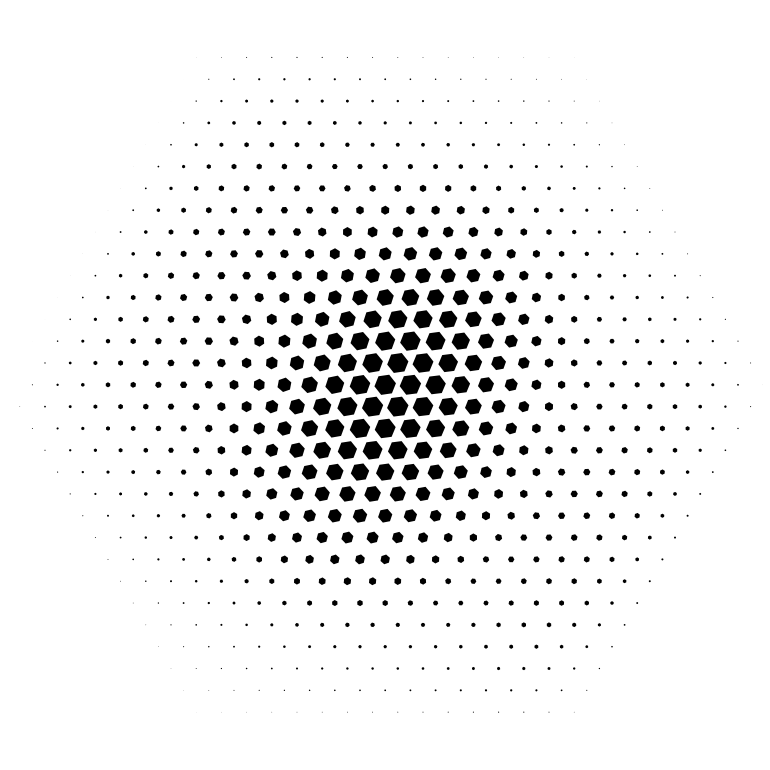

In [30]:
scale = 1/size

sector_I_points = np.array([i*scale*x_1 + j*scale*x_2 for i in range(size+1) for j in range(size+1)])
sector_II_points = np.array([i*scale*x_2 + j*scale*x_3 for i in range(size+1) for j in range(1,size+1)])
sector_III_points = np.array([i*scale*x_3 + j*scale*x_1 for i in range(1,size+1) for j in range(1,size+1)])

sectors = [sector_I_points,sector_II_points,sector_III_points]

fig, ax = plt.subplots(figsize=(10.8,10.8))
ax.cla()

print(len(Ts))
frame = -1

values = [solution[frame].sector_I,solution[frame].sector_II,solution[frame].sector_III]

for sector_points,sector_values,sector_size in zip(sectors,values,[(size+1)*(size+1),(size+1)*(size),(size)*(size)]):

    reshaped_val = np.reshape(sector_values,sector_size)

    norms = np.abs(reshaped_val)
    angles = np.angle(reshaped_val)

    for vertex, norm, angle in zip(sector_points,norms,angles):

        color = 'k'
        hexagon = mpl.patches.RegularPolygon(vertex,
                                         numVertices=6,
                                         radius=0.95*norm*scale/np.sqrt(3),
                                         fc='k',
                                         lw=0,
                                         ec='k',
                                         orientation=angle,
                                         )

        ax.add_patch(hexagon)

ax.axis('off')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
#fig.set_facecolor('k')
fig.patch.set_alpha(1)
fig.tight_layout()
plt.show()

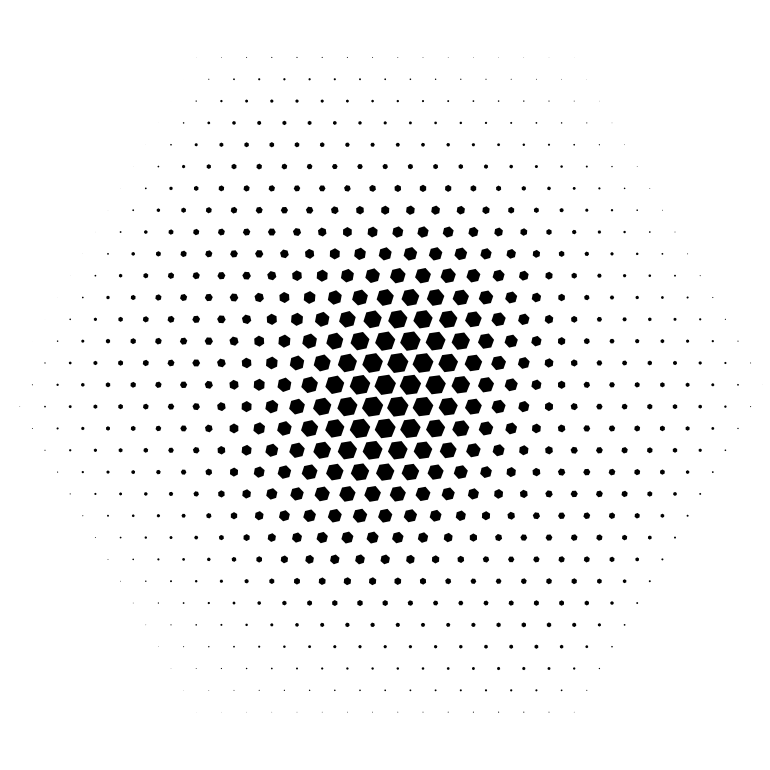

In [33]:
scale = 1/size

sector_I_points = np.array([i*scale*x_1 + j*scale*x_2 for i in range(size+1) for j in range(size+1)])
sector_II_points = np.array([i*scale*x_2 + j*scale*x_3 for i in range(size+1) for j in range(1,size+1)])
sector_III_points = np.array([i*scale*x_3 + j*scale*x_1 for i in range(1,size+1) for j in range(1,size+1)])


sectors = [sector_I_points,sector_II_points,sector_III_points]

fig, ax = plt.subplots(figsize=(10.8,10.8))

Ts = np.arange(0,t_end,dt)

n_frames = 60*10

step = int(len(Ts)/n_frames)
for frame,time in enumerate(range(0,len(Ts),step)):
    
    ax.cla()
    
    values = [solution[time].sector_I,solution[time].sector_II,solution[time].sector_III]

    for sector_points,sector_values,sector_size in zip(sectors,values,[(size+1)*(size+1),(size+1)*(size),(size)*(size)]):

        reshaped_val = np.reshape(sector_values,sector_size)

        norms = np.abs(reshaped_val)
        angles = np.angle(reshaped_val)

        for vertex, norm, angle in zip(sector_points,norms,angles):

            color = 'k'
            hexagon = mpl.patches.RegularPolygon(vertex,
                                             numVertices=6,
                                             radius=0.95*norm*scale/np.sqrt(3),
                                             fc='k',
                                             lw=0,
                                             ec='k',
                                             orientation=angle,
                                             )

            ax.add_patch(hexagon)
            
    ax.axis('off')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    #fig.set_facecolor('k')
    fig.patch.set_alpha(1)
    fig.tight_layout()
    fig.savefig('animation/schrodinger-hexagons%04d.png'%frame,dpi=200,bbox_inches='tight',pad_inches=0.0)
    print('Frame',frame+1,'of',len(Ts[::step]),end='\r')